In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 30','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57','column 58','column 59','column 60']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Sonar\Sonar_AL_20.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,NaN,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,NaN,0.1183,0.2583,0.2156,0.3481,NaN,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,NaN,0.0205,0.0368,0.1098,0.1276,NaN,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	0
float64		column 3	0
float64		column 4	41
float64		column 5	0
float64		column 6	0
float64		column 7	0
float64		column 8	0
float64		column 9	82
float64		column 10	0
float64		column 11	82
float64		column 12	41
float64		column 13	41
float64		column 14	82
float64		column 15	82
float64		column 16	41
float64		column 17	82
float64		column 18	82
float64		column 19	82
float64		column 20	82
float64		column 21	82
float64		column 22	82
float64		column 23	0
float64		column 30	82
float64		column 25	82
float64		column 26	41
float64		column 27	82
float64		column 28	41
float64		column 29	0
float64		column 30	82
float64		column 31	41
float64		column 32	41
float64		column 33	82
float64		column 34	41
float64		column 35	82
float64		column 36	82
float64		column 37	82
float64		column 38	41
float64		column 39	41
float64		column 40	41
float64		column 41	41
float64		column 42	0
float64		column 43	41
float64		column 44	82
float64		colum

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
count,208.000000,208.000000,208.000000,167.000000,208.000000,208.000000,208.000000,208.000000,126.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.052826,0.075202,0.104570,0.121747,0.134799,0.180591,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.048435,0.055552,0.059105,0.061788,0.085152,0.112338,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.006100,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.023900,0.038050,0.067025,0.080900,0.080425,0.104150,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.041500,0.062500,0.092150,0.106950,0.112100,0.157700,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.062100,0.100275,0.134125,0.154000,0.169600,0.228350,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.658700,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


<AxesSubplot:>

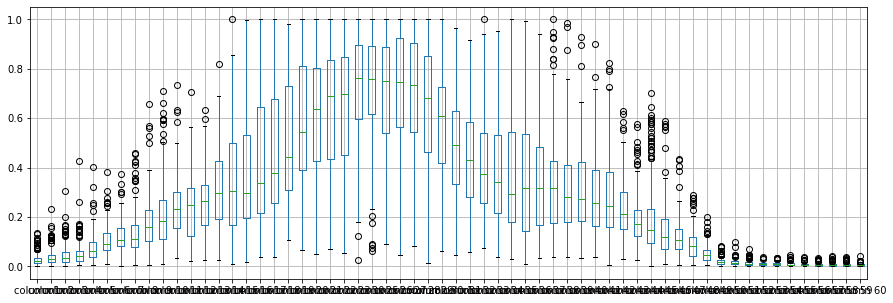

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.029164
column 2       0.038437
column 3       0.043832
column 4       0.052826
column 5       0.075202
column 6       0.104570
column 7       0.121747
column 8       0.134799
column 9       0.180591
column 10      0.208259
column 11      0.238664
column 12      0.240066
column 13      0.263915
column 14      0.310613
column 15      0.332817
column 16      0.369780
column 17      0.421331
column 18      0.459727
column 19      0.515019
column 20      0.574071
column 21      0.619067
column 22      0.642050
column 23      0.646975
column 30      0.721047
column 25      0.716466
column 26      0.694112
column 27      0.718033
column 28      0.706474
column 29      0.642074
column 30.1    0.578440
column 31      0.497632
column 32      0.438854
column 33      0.404759
column 34      0.387974
column 35      0.368504
column 36      0.367316
column 37      0.356190
column 38      0.330470
column 39      0.318737
column 40      0.309648
column 41      0.285740
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
column 1,1.000000,0.735896,0.571537,0.486504,0.344797,0.238921,0.260815,0.355523,0.218172,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
column 2,0.735896,1.000000,0.779916,0.595231,0.419669,0.332329,0.279040,0.334615,0.259860,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
column 3,0.571537,0.779916,1.000000,0.787671,0.546141,0.346275,0.190434,0.237884,0.269129,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
column 4,0.486504,0.595231,0.787671,1.000000,0.756026,0.334402,0.216374,0.240214,0.226400,0.199674,...,0.147009,0.362842,0.349364,0.317788,0.259490,0.261879,0.387334,0.351843,0.401165,0.402367
column 5,0.344797,0.419669,0.546141,0.756026,1.000000,0.597053,0.335422,0.204006,0.136012,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
column 6,0.238921,0.332329,0.346275,0.334402,0.597053,1.000000,0.702889,0.471683,0.321016,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
column 7,0.260815,0.279040,0.190434,0.216374,0.335422,0.702889,1.000000,0.675774,0.472376,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
column 8,0.355523,0.334615,0.237884,0.240214,0.204006,0.471683,0.675774,1.000000,0.785637,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
column 9,0.218172,0.259860,0.269129,0.226400,0.136012,0.321016,0.472376,0.785637,1.000000,0.885673,...,0.179577,0.245031,0.096229,0.258946,0.158849,0.243396,0.257943,0.147454,0.071268,0.068507
column 10,0.318276,0.270782,0.219637,0.199674,0.183219,0.288621,0.425448,0.652525,0.885673,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [60,60+14,60+14+14,60+14+14+14,60+14+14,60+14,60], vae_layer = False, seed = 140)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [60]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 13.70409943507268
Epoch: 1 , loss: 13.525952926048866
Epoch: 2 , loss: 13.462907350980318
Epoch: 3 , loss: 13.361063003540039
Epoch: 4 , loss: 13.258459017826961
Epoch: 5 , loss: 13.24622499025785
Epoch: 6 , loss: 13.179116982680101
Epoch: 7 , loss: 13.133928739107573
Epoch: 8 , loss: 13.052501091590294
Epoch: 9 , loss: 12.989823854886568
Epoch: 10 , loss: 12.891510303203876
Epoch: 11 , loss: 12.77657648233267
Epoch: 12 , loss: 12.675050515394945
Epoch: 13 , loss: 12.554571811969463
Epoch: 14 , loss: 12.311967409574068
Epoch: 15 , loss: 12.078677104069637
Epoch: 16 , loss: 11.799775563753569
Epoch: 17 , loss: 11.320203120891865
Epoch: 18 , loss: 10.811318544241098
Epoch: 19 , loss: 10.035034032968374
Epoch: 20 , loss: 9.062546546642597
Epoch: 21 , loss: 8.221071573404165
Epoch: 22 , loss: 7.624485712784987
Epoch: 23 , loss: 7.386420103219839
Epoch: 24 , loss: 7.047861686119666
Epoch: 25 , loss: 6.91410

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(208, 60)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       0.066400
column 2       0.057500
column 3       0.084200
column 4       0.038354
column 5       0.045800
column 6       0.077100
column 7       0.077100
column 8       0.113000
column 9       0.124515
column 10      0.183800
column 11      0.170643
column 12      0.187393
column 13      0.202176
column 14      0.220075
column 15      0.230663
column 16      0.264959
column 17      0.283556
column 18      0.312248
column 19      0.347363
column 20      0.384761
column 21      0.410911
column 22      0.429198
column 23      0.208200
column 30      0.492466
column 25      0.491707
column 26      0.273600
column 27      0.479517
column 28      0.500277
column 29      0.699000
column 30.1    0.402415
column 31      0.795600
column 32      0.325613
column 33      0.286859
column 34      0.694200
column 35      0.248637
column 36      0.245629
column 37      0.241233
column 38      1.000000
column 39      0.875300
column 40      0.227699
column 41      0.680300
column 42      0

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Sonar.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-0.189700,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,-0.023429,0.0,0.0,0.0,0.0,-0.185293,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.011171,0.0,0.0,0.0,0.0,0.053156,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

13.02817497546643

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

44.56104528767251

In [18]:
NRMS=numerator/denominator
NRMS


0.2923669068209802

In [19]:
new_df.iloc[66,:]

column 1       0.0265
column 2       0.0440
column 3       0.0137
column 4       0.0084
column 5       0.0305
column 6       0.0438
column 7       0.0341
column 8       0.0780
column 9       0.0844
column 10      0.0779
column 11      0.0327
column 12      0.2060
column 13      0.1908
column 14      0.1065
column 15      0.1457
column 16      0.2232
column 17      0.2070
column 18      0.1105
column 19      0.1078
column 20      0.1165
column 21      0.2224
column 22      0.0689
column 23      0.2060
column 30      0.2384
column 25      0.0904
column 26      0.2278
column 27      0.5872
column 28      0.8457
column 29      0.8467
column 30.1    0.7679
column 31      0.8055
column 32      0.6260
column 33      0.6545
column 34      0.8747
column 35      0.9885
column 36      0.9348
column 37      0.6960
column 38      0.5733
column 39      0.5872
column 40      0.6663
column 41      0.5651
column 42      0.5247
column 43      0.3684
column 44      0.1997
column 45      0.1512
column 46 

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0200,0.0371,0.0428,0.020700,0.0954,0.0986,0.1539,0.1601,0.121200,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.045471,0.1183,0.2583,0.2156,0.3481,0.148407,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.108300,0.0974,0.2280,0.2431,0.3771,0.559800,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.031671,0.0205,0.0368,0.1098,0.1276,0.112956,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.039400,0.0590,0.0649,0.1209,0.2467,0.356400,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.017700,0.0393,0.1630,0.2028,0.1694,0.232800,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.056400,0.0760,0.0958,0.0990,0.1018,0.103000,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.029200,0.0351,0.1171,0.1257,0.1178,0.125800,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.060800,0.0167,0.1354,0.1465,0.1123,0.194500,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [21]:
imputations[-1].to_excel("Sonar_AL_20(imp).xlsx", index=False, header=False)